## Simulation of a Dynamic Stuff Balance

### General case
Suppose we are interested in computing the amount of stuff in a system for some time horizon $0\rightarrow{T}$.
Further, suppose we broke this time horizon into many small segments, each with length $h$ such that $t_{i} = (i-1)h$.
Given a step-size $h>0$, the initial value of stuff, denoted by $x_{1}$, then the discrete forward approximation of the open stuff balance solution is given by:

$$x_{i+1} = x_{i} + h\left(\sum_{s\in\mathcal{S}}\nu_{s}\dot{x}_{s} + \dot{x}_{gen}\right)_{i}\qquad{i=1,2,\dots,T-1}$$

where $x_{i+1}$ denotes the amount of stuff at time point $i+1$, 
$x_{i}$ denotes the amount of stuff at time point $i$,  $T$ denotes the solution horizon and $h$ denotes the step size. The notation $\left(\star\right)_{i}$ denotes all terms are evaluated at time step $i$.

### Single Input Single Output (SISO) unstable stuff example
Fill me in here.

In [1]:
# load required code libraries -
using Distributions, Plots

In [72]:
# discrete stuff balance simulation -

# initialize -
number_of_sample_paths = 100
number_of_time_points = 501
T₀ = 0.0
T₁ = 500.0
h = (T₁ - T₀)/number_of_time_points
T = range(T₀,stop = T₁, length = number_of_time_points) |> collect
S = Array{Int64,2}(undef, number_of_time_points, number_of_sample_paths)

# setup parameter values -
λ₁ = 100   # stuff flow rate stream 1 (into system) units: stuff/time 
λ₂ = 80    # stuff degradation constant (1/time)^*
A = 1      # stuff exit flow rate constant - 
xₒ = 10    # initial amount of stuff in the system units: stuff

# initialize stuff array -
S[1,:] .= xₒ

# generate Poisson random variables for flows and generation terms
x_dot_1 = rand(Poisson(λ₁), number_of_time_points, number_of_sample_paths)
x_dot_gen = rand(Poisson(λ₂), number_of_time_points, number_of_sample_paths)

# main loop -
for s = 1:number_of_sample_paths
    for t = 1:(number_of_time_points - 1)
        
        # compute terms -
        flow_rate_1 = x_dot_1[t,s]
        flow_rate_2 = A*sqrt(S[t,s])
        
        # generation term -
        generation_term = 0.0
        if (x_dot_gen[t,s]<(S[t,s] + flow_rate_2))
            generation_term = x_dot_gen[t,s]
        else
            generation_term = ((S[t,s] + flow_rate_2)) - 1
        end
        
        # balance -
        S[t+1,s] = round(S[t,s] + h*(flow_rate_1 - flow_rate_2 - generation_term), digits=0)
    end
end

In [73]:
S

501×100 Matrix{Int64}:
  10   10   10   10   10   10   10   10  …   10   10   10   10   10   10   10
 106   81  110   83   75   99   82   93     107   83   89   86  103   88  108
 123   74  143   82   77  103   94   81     129   91   94  100  103   73  108
 156   78  143  100   76  122  112  107     155  120   94   96  103   97   91
 138   98  142  111   84  133   90  105     173  140   99  101  106   89   81
 136  120  152  118   85  150   99  106  …  194  152  128  115  117  105  110
 142  132  171  124   98  158  103  113     219  173  140  118   99  116  122
 110  159  208  147  100  165  119  105     223  181  154  135  124  102  120
 122  182  224  153  110  178  133  109     258  204  147  137  126  112  145
 111  172  224  155  117  203  145  112     267  197  165  155  153  123  133
 102  190  205  170  134  206  133  109  …  256  189  152  160  153  105  178
  82  204  210  184  159  226  164  136     246  192  158  175  146  119  195
  99  205  215  180  171  242  180  127  

### Theoretical steady-state estimate of stuff in the system
If the amount of stuff in an open system is not changing with time, then that system is said to be at a [steady-state](https://en.wikipedia.org/wiki/Steady_state). In mathematical terms, once a system has reached a steady-state then the difference in the amount of stuff in the system at any two subsequent time points is zero, i.e., 

$$x_{i+1} - x_{i} = 0\qquad{i=1,2,\dots,T-1}$$

When a system is at steady-state, the accumulation terms are equal to zero. Transport into and from the 
system is balanced by generation:

$$\sum_{s\in\mathcal{S}}\nu_{s}\dot{x}_{s} + \dot{x}_{gen} = 0$$

In [74]:
SS = ((λ₁ - λ₂)/A)^2

400.0

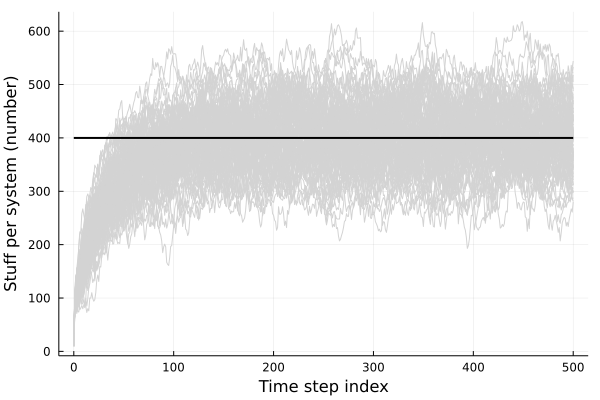

In [75]:
plot(T, S[:,1:], label="", c=:lightgray)
plot!(T,SS*ones(length(T)), label="", c=:black, lw=2)
xlabel!("Time step index", fontsize = 18)
ylabel!("Stuff per system (number)", fontsize=18)